In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import mglearn
%matplotlib inline

# 2 지도 학습

## 2.1 분류와 회귀

### 분류
+ 클래스 레이블 선택
  + 이진 분류, 다중 분류

## 2.2 일반화, 과대적합, 과소적합

+ 일반화 : 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있다.
+ 과대적합 : train 데이터에 최적화 되어 있다.
+ 과소적합 : train 데이터의 특성을 잡아내지 못했다.

## 2.3 지도학습 알고리즘

### 2.3.1 예베에 사용할 데이터셋

+ 이진 분류 데이터셋(forge)

X.shape : (26, 2)


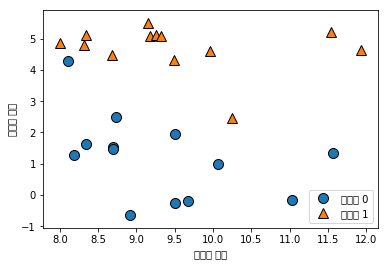

In [3]:
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", '클래스 1'], loc=4)
plt.xlabel('첫번째 특성')
plt.ylabel('두번째 특성')
print('X.shape : {}'.format(X.shape))

+ 회귀 데이터셋(wave)

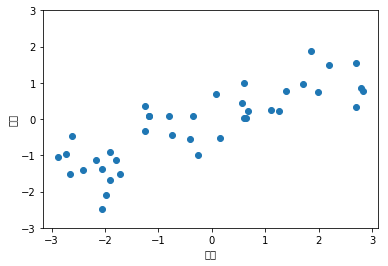

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('특성')
plt.ylabel('타깃')

+ 위스콘신 유방암 데이터셋

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.key() : \n{}".format(cancer.keys()))

cancer.key() : 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [6]:
print('유방암 데이터의 형태 : {}'.format(cancer.data.shape))

유방암 데이터의 형태 : (569, 30)


In [7]:
print('클래스 별 샘플의 개수 : {}'.format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스 별 샘플의 개수 : {'malignant': 212, 'benign': 357}


In [8]:
print('특성 이름 : {}'.format(cancer.feature_names))

특성 이름 : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
pd.DataFrame(data=cancer.data, columns=cancer.feature_names).tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


+ 보스턴 주택가격

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
print('데이터의 형태 : {}'.format(boston.data.shape))

데이터의 형태 : (506, 13)


+ 보스턴 주택가격(특성공학)

In [11]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape : {}'.format(X.shape))

X.shape : (506, 104)


### 2.3.2 K-최근접 이웃(k-NN)

#### K-최근접 이웃 분류
+ 가장 가까운 훈련데이터 포인트를 최근접 이웃으로 찾아 예측
+ k개의 이웃을 찾아 투표를 통한 예측

**1개의 이웃**

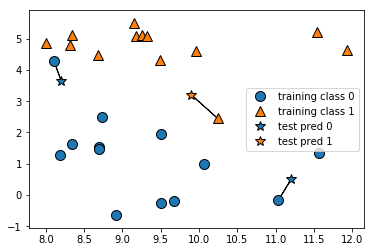

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

**3개의 이웃**

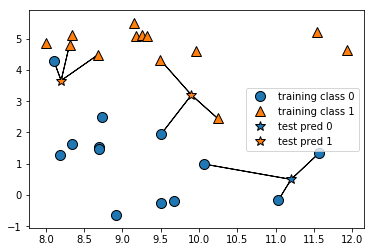

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

+ scikit-learn k-최근접 이웃

In [17]:
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [20]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [21]:
print('테스트 세트 예측 : {}'.format(clf.predict(X_test)))

테스트 세트 예측 : [1 0 1 0 1 0 0]


In [24]:
print('테스트 세트 정확도 : {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.86


#### KNeighborsClassifier 분석
+ 2차원 데이터셋일때 모든 테스트 포인트 예측을 xy평면에 그림 -> **결정경계** 볼수 있음
+ 이웃이 적을수록 모델이 복잡함

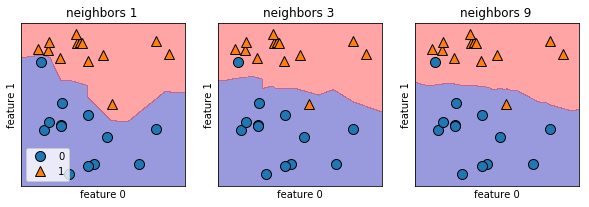

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메서드는 self 객체를 반환합니다
    # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸수 있음
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('neighbors {} '.format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

**sklearn 구현**
+ 모델의 복잡도와 일반화 사이의 관계(유방암 데이터)

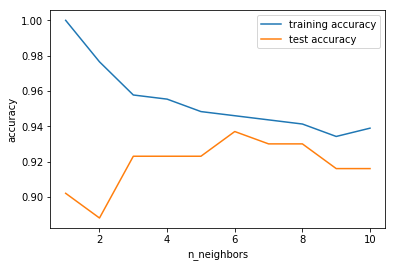

In [33]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()

#### K-최근접 이웃 회귀
+ 이웃이 하나일때 가장 가까운 이웃의 타깃값이 예측값

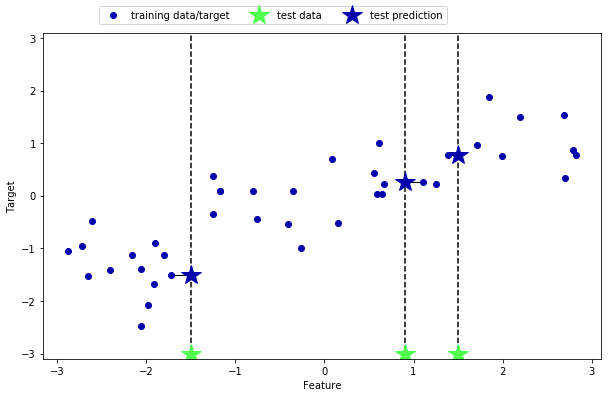

In [35]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

+ 여러개의 최근접 이웃을 사용할 땐 이웃 간의 평균이 예측값

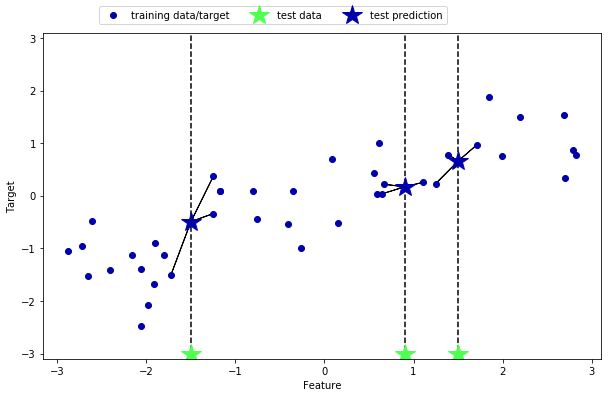

In [36]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

**sklearn 구현**

In [37]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#이웃의 수를 3으로 하여 모델의 객체 생성.
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [41]:
print("테스트 세트 예측 : \n{}".format(reg.predict(X_test)))

테스트 세트 예측 : 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


+ 회귀일때 score는 $R^2$

In [47]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


#### KNeighborsRegressor 분석

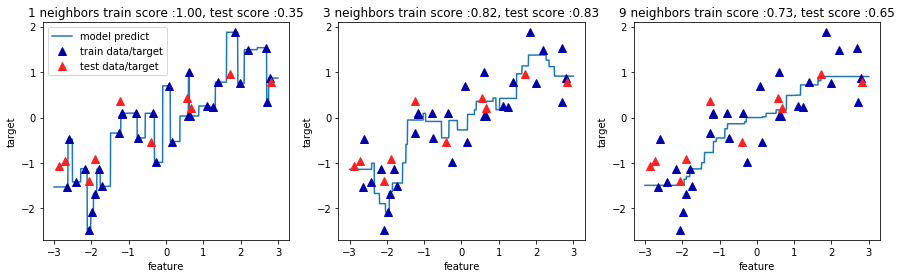

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3과 3 tkdldp 1,1000개의 데이터 생성
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, '^', c=mglearn.cm2(1), markersize=8)
    ax.set_title('{} neighbors train score :{:.2f}, test score :{:.2f}'.format(n_neighbors, reg.score(X_train, y_train), \
                                                                       reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    
axes[0].legend(['model predict', 'train data/target', 'test data/target'], loc='best')

#### 장단점과 매개변수
+ 매개변수 : 거기를 재는 방법(기본적으로 유클리디안 거리)과 이웃의 수
+ 장점 : 이해하기 쉽고, 많이 조정하지 않아도 자주 좋은 성능을 발휘
+ 단점 : 훈련 세트가 크면 예측이 느려지고, 특성 값 대부분이 0 인(즉, 희소한) 데이터 셋과는 특히 잘 작동하지 않음